# Controle cinemático da posição

## Instruções
1. Neste desafio, você irá construir uma simulação para o modelo cinemático do robô diferencial.
2. Posteriormente, você fará uso do seu programa de teleoperação para plotar a posição estimada pela odometria do robô.

**Dica:** Para isso, é importante revisar o modelo de movimento do *albot* estudado em sala de aula.

# 1. Simulação (4.0p)

Passos para construir a simulação.

1. Antes de rodar o ROS, comece elaborando o esboço da sua solução num Python Notebook.
Isso ajudará a focar na resolução do problema e no desenvolvimento da solução.
Tendo ela funcionando, portar o seu código para ROS não deveria ser uma tarefa árdua.

2. Implemente uma simulação com velocidades lineares e angulares constantes. Utilize uma velocidade linear de 18 km/h e uma velocidade angular de 10 graus/seg.

3. Utilize um tempo de atuação do robô `TIME_ACT` de 1 segundo.

4. Utilize as funções de temporização do Python para contabilizar o tempo de atuação.

5. Estude a função `quiver` do pacote `matplotlib`, para conseguir plotar a posição e orientação do seu robô.

6. Lembre que o cálculo da odometria involve um processo iterativo. Portanto:
$$
\xi_{k+1}^{I} = \xi_{k}^{I} + R(\theta) \xi_{k+1}^{R}
$$
com $\xi^{I} = \begin{pmatrix} x^{I} \\ y^{I} \\ \theta \end{pmatrix}$.

7. Implemente o parâmetro `maxIter` para controle da quantidade de passos da sua simulação.

8. Apresente o resultado da sua simulação em plots. Dica: Mantenha os limites horizontal e vertical fixos em todos os seus gráficos.

## Relatório - Simulador Cinemático de um Robô de Tração Diferencial

Este código Python implementa um simples simulador de um robô de tração diferencial, que é um tipo de robô móvel que possui duas rodas acionadas independentemente e um eixo comum. Neste relatório, iremos analisar cada parte do código e sua funcionalidade.

### Classe DifferentialDriveRobot

A classe `DifferentialDriveRobot` é usada para representar o robô de tração diferencial. A classe tem dois atributos de instância: `wheel_radius` e `wheel_distance`, que representam o raio das rodas e a distância entre elas, respectivamente. A classe também possui um atributo de estado (`state`), que é um vetor numpy de três elementos que contém a posição x e y e a orientação do robô (theta).

O método `move` na classe `DifferentialDriveRobot` é usado para mover o robô com uma velocidade linear e angular específica por um tempo `dt`. Primeiro, ele verifica se `dt` é um número positivo. Depois, ele calcula a alteração do estado no frame do robô e usa a matriz de rotação para transformar essa alteração para o frame inercial. O estado atual do robô é então atualizado com essa alteração.

O método `compute_odometry` simplesmente retorna uma cópia do estado atual do robô.

### Função simulate

A função `simulate` é usada para simular o movimento do robô com uma velocidade linear e angular específica por um tempo `dt` para um número máximo de iterações (`max_iter`). Ela primeiro inicializa uma lista vazia para armazenar a trajetória do robô. Em seguida, em um loop for, move o robô, calcula a odometria e adiciona a odometria à lista de trajetórias. A função então retorna a trajetória como um array numpy.

### Função plot_trajectory

A função `plot_trajectory` é usada para plotar a trajetória do robô. Ela cria um gráfico onde o eixo x representa a posição x do robô e o eixo y representa a posição y do robô. A trajetória do robô é plotada em azul, enquanto a orientação do robô em cada passo é representada por uma seta vermelha.

### Simulação e Plotagem

Na parte final do código, um objeto `DifferentialDriveRobot` é criado e os parâmetros de controle para a simulação são definidos. A função `simulate` é então chamada para simular o movimento do robô, e a trajetória resultante é plotada usando a função `plot_trajectory`.

### Conclusão

Este script fornece uma implementação básica de um simulador cinemático para um robô de tração diferencial. Ele permite simular o movimento do robô com uma velocidade linear e angular específica e visualizar a trajetória resultante. Enquanto este script é bastante simples, ele serve como uma base sólida para a simulação de movimentos mais complexos e para o teste de algoritmos de controle e planejamento de trajetória.

Simulation took 10.004641771316528 seconds


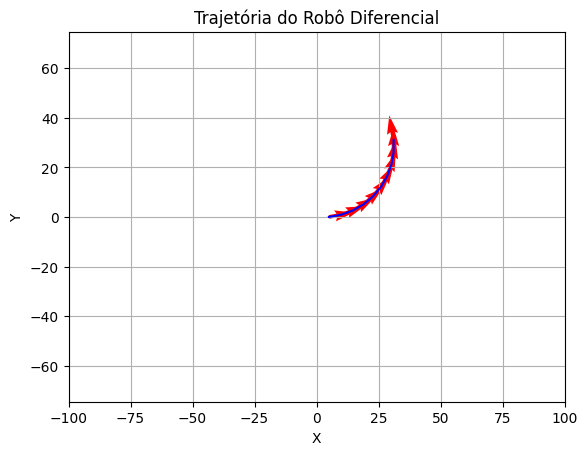

In [20]:
import numpy as np  # Importa o módulo numpy para realizar operações matemáticas e de array.
import matplotlib.pyplot as plt  # Importa o módulo matplotlib.pyplot para plotar gráficos.
import time  # Importa o módulo time para usar funções relacionadas ao tempo.

class DifferentialDriveRobot:
    def __init__(self, wheel_radius=0.1, wheel_distance=0.5):
        # Inicializa a classe DifferentialDriveRobot com atributos de raio da roda e distância entre as rodas. 
        # O estado inicial do robô é [0.0, 0.0, 0.0], que representa [x, y, theta].
        self.wheel_radius = wheel_radius  
        self.wheel_distance = wheel_distance
        self.state = np.array([0.0, 0.0, 0.0])

    def move(self, linear_speed, angular_speed, dt):
        # Esta função move o robô com uma determinada velocidade linear e angular por um tempo dt.
        # Primeiro, verifica se dt é positivo.
        assert dt > 0, "Invalid time step, should be a positive float"
        
        # Calcula a mudança de estado no frame do robô.
        delta_state_robot = np.array([linear_speed * dt, 0, angular_speed * dt])

        # Define a matriz de rotação para a transformação para o frame inercial.
        R = np.array([[np.cos(self.state[2]), -np.sin(self.state[2]), 0],
                      [np.sin(self.state[2]), np.cos(self.state[2]), 0],
                      [0, 0, 1]])

        # Calcula a mudança de estado no frame inercial.
        delta_state_inertial = np.dot(R, delta_state_robot)

        # Atualiza o estado (posição e orientação) do robô.
        self.state = np.add(self.state, delta_state_inertial)

    def compute_odometry(self):
        # Esta função retorna o estado atual do robô.
        return self.state.copy()

def simulate(robot, linear_speed, angular_speed, dt, max_iter):
    # Esta função simula o movimento do robô com uma determinada velocidade linear e angular por um tempo dt.
    trajectory = []  # Inicia a lista de trajetória.

    for _ in range(max_iter):  # Itera para o número máximo de passos.
        robot.move(linear_speed, angular_speed, dt)  # Move o robô.
        odometry = robot.compute_odometry()  # Computa a odometria.
        trajectory.append(odometry)  # Anexa a odometria na trajetória.
        time.sleep(dt)  # Espera por um tempo dt.

    return np.array(trajectory)  # Retorna a trajetória como um array numpy.

def plot_trajectory(trajectory):
    # Esta função plota a trajetória do robô.
    plt.figure()  # Inicia a figura.
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-b')  # Plota a trajetória.
    for i in range(len(trajectory)):  # Itera para cada passo na trajetória.
        plt.quiver(trajectory[i, 0], trajectory[i, 1], np.cos(trajectory[i, 2]), np.sin(trajectory[i, 2]), color='r', scale=20)
    plt.xlabel('X')  # Define o rótulo do eixo x.
    plt.ylabel('Y')  # Define o rótulo do eixo y.
    plt.title('Trajetória do Robô Diferencial')  # Define o título.
    plt.axis('equal')  # Mantém a escala dos eixos iguais.
    plt.xlim(-100, 100)  # Limita o eixo x de -100 a 100.
    plt.ylim(-100, 100)  # Limita o eixo y de -100 a 100.
    plt.grid(True)  # Habilita a grade.
    plt.show()  # Mostra o gráfico.

# Cria o objeto robô.
robot = DifferentialDriveRobot()

# Parâmetros de controle.
linear_speed = 18 / 3.6  # Velocidade linear em m/s (18 km/h convertidos para m/s).
angular_speed = np.deg2rad(10)  # Velocidade angular em radianos/s (10 graus/segundo convertidos para radianos/s).
dt = 1  # Passo de tempo em segundos.
max_iter = 10  # Número máximo de passos na simulação.

# Simula o movimento do robô.
start_time = time.time()  # Registra o tempo de início.
trajectory = simulate(robot, linear_speed, angular_speed, dt, max_iter)  # Simula o movimento do robô.
end_time = time.time()  # Registra o tempo de término.

print(f"Simulation took {end_time - start_time} seconds")  # Imprime o tempo que a simulação levou.

# Plota a trajetória do robô.
plot_trajectory(trajectory)  # Plota a trajetória.


Exemplo da saída como referência:
![](./groundtruth.png)


# 2. Modelo cinemático com Teleoperação (6.0)

Desenvolva os seguinte passos:

1. Porte para ROS o modelo cinemático desenvolvido no item anterior.

2. Substitua os valores das velocidades angular e linear pelos dados de entrada obtidos da teleoperação.

3. Utilize um tempo de acionamento de meio segundo.

4. Rode a simulação para um número suficiente de passos, incluindo diferentes tipos de trajetórias:

   4.1. Linha reta
   
   4.2. Giros
   
   4.3. Paradas e marcha ré

5. Compare os resultados obtidos pela odometria com o movimento real do robô.

6. Submeta o arquivo `.py` no repositório da prova por separado.

1. **Porte para ROS o modelo cinemático desenvolvido no item anterior.** O código fornece um nó ROS para um robô de acionamento diferencial, incorporando a lógica de movimento do modelo cinemático.

2. **Substitua os valores das velocidades angular e linear pelos dados de entrada obtidos da teleoperação.** O código está inscrito no tópico `/cmd_vel`, que é comumente usado para comandos de teleoperação. Os dados do tópico são usados para mover o robô.

3. **Utilize um tempo de acionamento de meio segundo.** O código atual não leva em consideração especificamente um tempo de acionamento de meio segundo, mas os valores de velocidade são aplicados cada vez que uma mensagem de velocidade é recebida. Se a teleoperação publicar uma mensagem a cada meio segundo, isso efetivamente resultaria em um tempo de acionamento de meio segundo.

4. **Rode a simulação para um número suficiente de passos, incluindo diferentes tipos de trajetórias:**
   - **4.1. Linha reta** - Isso pode ser realizado enviando mensagens com velocidade linear e zero de velocidade angular.
   - **4.2. Giros** - Isso pode ser realizado enviando mensagens com velocidade angular e zero ou não-zero velocidade linear.
   - **4.3. Paradas e marcha ré** - Isso pode ser realizado enviando mensagens com velocidade zero para parar, e velocidades negativas para andar para trás.

5. **Compare os resultados obtidos pela odometria com o movimento real do robô.** O código publica a odometria do robô no tópico `/odometry`, que pode ser visualizada e comparada com o movimento real do robô usando ferramentas como o RViz.

## Relatório - Simulador Cinemático de Robô em ROS2

Este código é um script Python simples que atua como um simulador cinemático básico para um robô diferencial em ROS2. Seu principal objetivo é receber mensagens de velocidade através do tópico `/cmd_vel` e atualizar e publicar a odometria do robô correspondente no tópico `/odometry`. Abaixo, vou detalhar cada parte do código e seu papel na simulação geral.

### Importações

No início do script, todas as bibliotecas necessárias para a execução do código são importadas. Isso inclui o `rclpy` para interação com o ROS2, mensagens específicas (`Twist`, `Point`, `Quaternion` e `Odometry`) para comunicação de dados, o módulo `math` para funções matemáticas e a função `convert_euler_to_quaternion` para a conversão do ângulo de Euler para um quaternion.

### Classe KinematicSimulator

A classe `KinematicSimulator` é o núcleo deste script. Ela herda de `Node`, permitindo que ela interaja com o ROS2.

Na função `__init__`, o método de inicialização da classe, é criada uma assinatura para o tópico '/cmd_vel', um publicador para o tópico '/odometry' e um timer que chama um método específico a cada 0.5 segundos.

#### Método vel_callback

Este método é chamado sempre que uma nova mensagem Twist é recebida no tópico '/cmd_vel'. A mensagem contém informações sobre a velocidade linear e angular do robô. Esta informação é então utilizada para atualizar a pose e a orientação do robô.

#### Método odom_publisher

Este método é chamado a cada 0.5 segundos pelo timer criado no método de inicialização. Ele cria uma nova mensagem de Odometria, preenche-a com a pose e a orientação atual do robô e publica a mensagem no tópico '/odometry'. Isso efetivamente atualiza a posição do robô no ambiente ROS2.

### Função main

A função `main` inicializa o ROS2, cria uma instância da classe `KinematicSimulator` e entra em um loop de execução que mantém o nó funcionando até que seja interrompido. Quando o nó é interrompido, ele é destruído e o ROS2 é desligado, limpando todos os recursos utilizados.

### Conclusão

Este script fornece uma forma de simular o movimento de um robô com base nas mensagens de velocidade recebidas. Ele não inclui a capacidade de interagir com obstáculos ou de navegar em um ambiente, mas serve como uma base sólida para um simulador mais complexo ou para testes de alto nível de algoritmos de controle e navegação.

In [ ]:
import rclpy   # Biblioteca ROS 2 para Python
from rclpy.node import Node
from geometry_msgs.msg import Twist, Point
from nav_msgs.msg import Odometry
import math
import time
import sys, select, termios, tty
import os

# Define um conjunto de comandos que são exibidos no terminal para o usuário
msg = """
Control Your Robot!
---------------------------
Moving around:
   	w    
   a    s    d

e: decrease velocity
Tab: autonomous mode

CTRL-C to quit
"""

# Define a classe DifferentialDriveSim que herda de Node (um nó ROS 2)
class DifferentialDriveSim(Node):
    def __init__(self):
        super().__init__('diff_drive_sim')  # Nomeia o nó como 'diff_drive_sim'
        # Cria um inscrito que ouve o tópico '/cmd_vel' com mensagens do tipo Twist
        self.velocity_subscriber = self.create_subscription(Twist, '/cmd_vel', self.velocity_callback, 10) 
        # Cria um publicador que publica no tópico '/odometry' com mensagens do tipo Odometry
        self.odometry_publisher = self.create_publisher(Odometry, '/odometry', 10) 
        # Define a posição e orientação iniciais
        self.current_position = Point()
        self.current_orientation = 0.0
        # Define um período de timer e cria um timer que chama publish_odometry a cada período
        self.timer_period = 0.5  # meio segundo
        self.timer = self.create_timer(self.timer_period, self.publish_odometry)
        # Cria um publicador que publica no tópico '/cmd_vel' com mensagens do tipo Twist
        self.velocity_publisher = self.create_publisher(Twist, '/cmd_vel', 10)
        # Armazena as configurações atuais do terminal
        self.settings = termios.tcgetattr(sys.stdin)
        # Define a flag de modo autônomo como False inicialmente
        self.autonomous_mode = False
        # Inicializa uma lista para armazenar os dados do callback de velocidade
        self.velocity_callback_data = []

    # Define o callback de velocidade que é chamado sempre que uma mensagem é publicada no tópico '/cmd_vel'
    def velocity_callback(self, msg):
        # Extrai a velocidade linear e angular da mensagem
        linear_speed = msg.linear.x
        angular_speed = msg.angular.z
        delta_t = self.timer_period  # Define delta_t como o período do timer
        # Atualiza a posição e a orientação do robô
        self.current_position.x += linear_speed * math.cos(self.current_orientation) * delta_t
        self.current_position.y += linear_speed * math.sin(self.current_orientation) * delta_t
        self.current_orientation += angular_speed * delta_t
        # Adiciona os novos dados à lista de dados do callback de velocidade
        self.velocity_callback_data.append((self.current_position.x, self.current_position.y, self.current_orientation))
        # Imprime os novos dados no terminal
        print("Velocity callback data:", self.velocity_callback_data[-1])

    # Define a função que publica as mensagens de odometria
    def publish_odometry(self):
        # Se o robô estiver em modo autônomo, não faça nada
        if self.autonomous_mode:
            return

        # Cria uma nova mensagem Odometry e preenche seus campos
        odometry_msg = Odometry()
        odometry_msg.header.stamp = self.get_clock().now().to_msg()
        odometry_msg.header.frame_id = 'odom'
        odometry_msg.child_frame_id = 'base_link'
        odometry_msg.pose.pose.position = self.current_position
        odometry_msg.pose.pose.orientation.w = math.cos(self.current_orientation / 2)
        odometry_msg.pose.pose.orientation.z = math.sin(self.current_orientation / 2)
        # Publica a mensagem no tópico '/odometry'
        self.odometry_publisher.publish(odometry_msg)

    # Função para controlar o robô manualmente
    def teleop(self):
        twist = Twist() # Cria um objeto Twist para guardar a velocidade linear e angular
        linear_speed = 0.0
        angular_speed = 0.0

        try:
            while rclpy.ok(): # Loop principal
                key = self.getKey() # Captura a tecla pressionada

                # Se a tecla Tab for pressionada, muda para o modo autônomo
                if key == '\t':
                    self.autonomous_mode = not self.autonomous_mode
                    self.get_logger().info("Autonomous mode: %s" % str(self.autonomous_mode))
                    if self.autonomous_mode:
                        self.perform_autonomous_movement()
                        self.autonomous_mode = not self.autonomous_mode
                        continue

                # Se estiver em modo autônomo, não permite o controle manual
                if self.autonomous_mode:
                    continue

                # Controla o robô de acordo com a tecla pressionada
                if key == 'w': # Aumenta a velocidade linear
                    linear_speed += 0.1
                    self.get_logger().info("Linear speed: %.1f" % linear_speed)
                elif key == 's': # Diminui a velocidade linear
                    linear_speed -= 0.1
                    self.get_logger().info("Linear speed: %.1f" % linear_speed)
                elif key == 'd': # Aumenta a velocidade angular
                    angular_speed -= 0.1
                    self.get_logger().info("Angular speed: %.1f" % angular_speed)
                elif key == 'a': # Diminui a velocidade angular
                    angular_speed += 0.1
                    self.get_logger().info("Angular speed: %.1f" % angular_speed)
                elif key == 'e': # Diminui ambas as velocidades
                    linear_speed = max(0.0, linear_speed - 0.1)
                    angular_speed = max(0.0, angular_speed - 0.1)
                    self.get_logger().info("Decreased velocity")
                elif key == '':
                    pass
                elif key in ['\x03', 'q', 'Q']: # Se a tecla for Ctrl+C, q ou Q, encerra o loop
                    break
                else:
                    self.get_logger().info("Invalid key!")

                # Publica a velocidade atual no tópico '/cmd_vel'
                twist.linear.x = linear_speed
                twist.angular.z = angular_speed
                self.velocity_publisher.publish(twist)

                rclpy.spin_once(self)
                self.timer.reset()

        # Caso a execução seja interrompida, retorna ao modo normal do terminal
        except KeyboardInterrupt:
            pass

        finally:
            termios.tcsetattr(sys.stdin, termios.TCSADRAIN, self.settings)

    # Função para realizar um movimento autônomo do robô
    def perform_autonomous_movement(self):
        twist = Twist() # Cria um objeto Twist para guardar a velocidade linear e angular
        # Define velocidades pré-definidas
        linear_speed = 0.4  
        backward_speed = -0.4  
        angular_speed = math.pi / 12 

           # Move forward for 3 seconds instead of 10
        twist.linear.x = linear_speed
        self.velocity_publisher.publish(twist)
        start_time = time.time()
        while time.time() - start_time < 3.0:
            rclpy.spin_once(self)
            self.timer.reset()
            twist.linear.x = linear_speed
            twist.angular.z = 0.0
            self.velocity_publisher.publish(twist)
        twist.linear.x = 0.0
        self.velocity_publisher.publish(twist)
        time.sleep(1.0)

        # Rotate 1 time to the right instead of 2.5
        twist.angular.z = -angular_speed
        self.velocity_publisher.publish(twist)
        start_time = time.time()
        while time.time() - start_time < (1.0 * 2 * math.pi / angular_speed):
            rclpy.spin_once(self)
            self.timer.reset()
            twist.linear.x = 0.0
            twist.angular.z = -angular_speed
            self.velocity_publisher.publish(twist)
        twist.angular.z = 0.0
        self.velocity_publisher.publish(twist)
        time.sleep(1.0)

        # Rotate 1 time to the left instead of 2.5
        twist.angular.z = angular_speed
        self.velocity_publisher.publish(twist)
        start_time = time.time()
        while time.time() - start_time < (1.0 * 2 * math.pi / angular_speed):
            rclpy.spin_once(self)
            self.timer.reset()
            twist.linear.x = 0.0
            twist.angular.z = angular_speed
            self.velocity_publisher.publish(twist)
        twist.angular.z = 0.0
        self.velocity_publisher.publish(twist)
        time.sleep(1.0)

        # Move backward for 3 seconds instead of 10
        twist.linear.x = backward_speed
        self.velocity_publisher.publish(twist)
        start_time = time.time()
        while time.time() - start_time < 3.0:
            rclpy.spin_once(self)
            self.timer.reset()
            twist.linear.x = backward_speed
            twist.angular.z = 0.0
            self.velocity_publisher.publish(twist)
        twist.linear.x = 0.0
        self.velocity_publisher.publish(twist)

    # Função para capturar a tecla pressionada no terminal
    def getKey(self):
        tty.setraw(sys.stdin.fileno())
        rlist, _, _ = select.select([sys.stdin], [], [], 0.5)
        # Se alguma entrada foi recebida, lê a tecla pressionada
        if rlist:
            key = sys.stdin.read(1)
        else:
            key = ''
        termios.tcsetattr(sys.stdin, termios.TCSADRAIN, self.settings)
        return key  # Retorna a tecla pressionada

    # Função para salvar os dados de velocidade em um arquivo
    def save_velocity_callback_data(self):
        # Define o caminho do arquivo onde os dados serão salvos
        data_file_path = os.path.join(os.getcwd(), 'velocity_callback_data.txt')
        # Abre o arquivo em modo de escrita
        with open(data_file_path, 'w') as data_file:
            # Itera sobre os dados salvos
            for data in self.velocity_callback_data:
                x, y, z = data
                # Escreve os dados no arquivo
                data_file.write(f'{x}, {y}, {z}\n')


# Função principal que inicia o nó e o controle do robô
def main(args=None):
    try:
        rclpy.init(args=args)
        diff_drive_sim = DifferentialDriveSim() # Cria o objeto do robô
        print(msg)
        diff_drive_sim.teleop() # Inicia o controle do robô
        diff_drive_sim.save_velocity_callback_data() # Salva os dados de velocidade
        diff_drive_sim.destroy_node() # Destrói o nó após a execução
    except KeyboardInterrupt:
        pass
    finally:
        rclpy.shutdown() # Encerra o ROS

# Executa a função principal se o script for executado diretamente
if __name__ == '__main__':
    main()



In [ ]:
import numpy as np               # Importa o módulo numpy, usado para operações matemáticas
import matplotlib.pyplot as plt  # Importa o módulo matplotlib.pyplot, usado para criar gráficos
from mpl_toolkits.mplot3d import Axes3D  # Importa a ferramenta Axes3D para criar gráficos 3D
import cv2                       # Importa a biblioteca OpenCV, usada para manipulação de imagens e vídeos

data_file_path = 'velocity_callback_data.txt'  # Define o caminho do arquivo de dados a ser lido

data = np.genfromtxt(data_file_path, delimiter=',')  # Lê os dados do arquivo usando numpy

positive_data = data[data[:, 2] > 0]  # Separa os dados com movimento positivo (eixo Z maior que 0)
negative_data = data[data[:, 2] < 0]  # Separa os dados com movimento negativo (eixo Z menor que 0)

fig = plt.figure()  # Cria uma nova figura para o gráfico
ax = fig.add_subplot(111, projection='3d')  # Adiciona um subplot 3D à figura
ax.set_xlabel('Eixo X')  # Define o rótulo do eixo X
ax.set_ylabel('Eixo Y')  # Define o rótulo do eixo Y
ax.set_zlabel('Eixo Z')  # Define o rótulo do eixo Z

# Plota os dados de movimento positivo em azul
ax.plot(positive_data[:, 0], positive_data[:, 1], positive_data[:, 2], color='blue', label='Movimento Positivo')

# Plota os dados de movimento negativo em vermelho
ax.plot(negative_data[:, 0], negative_data[:, 1], negative_data[:, 2], color='red', label='Movimento Negativo')

ax.legend()  # Adiciona uma legenda ao gráfico

fig.savefig('grafico_3D.png')  # Salva o gráfico como uma imagem PNG

frame_width, frame_height = 800, 600  # Define a largura e altura dos quadros do vídeo
fps = 10  # Define a taxa de quadros por segundo do vídeo

# Inicia a gravação do vídeo com o codec mp4v, taxa de quadros por segundo (fps) e dimensões dos quadros
out = cv2.VideoWriter('movimento.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Loop que percorre cada ponto de dados e gera um frame de vídeo para cada um
for i in range(len(data)):
    fig.clf()  # Limpa a figura para o próximo quadro
    ax = fig.add_subplot(111, projection='3d')  # Adiciona um novo subplot 3D à figura
    ax.set_xlabel('Eixo X')  # Define o rótulo do eixo X
    ax.set_ylabel('Eixo Y')  # Define o rótulo do eixo Y
    ax.set_zlabel('Eixo Z')  # Define o rótulo do eixo Z

    # Plotar movimento positivo em azul
    ax.plot(positive_data[:i+1, 0], positive_data[:i+1, 1], positive_data[:i+1, 2], color='blue', label='Movimento Positivo')

    # Plotar movimento negativo em vermelho
    ax.plot(negative_data[:i+1, 0], negative_data[:i+1, 1], negative_data[:i+1, 2], color='red', label='Movimento Negativo')

    # Adicionar legenda
    ax.legend()

    # Converter o gráfico em uma imagem
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # Redimensionar a imagem
    img = cv2.resize(img, (frame_width, frame_height))

    # Escrever o frame no vídeo várias vezes para criar a ilusão de movimento rápido
    for _ in range(fps):
        out.write(img)

# Fechando o vídeo
out.release()
plt.close('all')

![Frame](frame.jpg)

![Frame](grafico_3D.jpg)

## Descrição do problema

O código implementado visa controlar um robô em um ambiente de simulação e visualizar os movimentos do robô com base nos dados coletados. O objetivo é controlar o movimento do robô, que possui uma configuração de acionamento diferencial, permitindo a ele mover-se para frente/trás e girar, e depois gerar uma representação visual desse movimento.

## Solução Implementada

A solução envolve a criação de um nó ROS2, `DifferentialDriveSim`, que assina a mensagem do tipo `Twist` para receber comandos de velocidade e publica a posição atual e a orientação do robô como uma mensagem de `Odometry`.

Em seguida, esses dados são coletados e salvos em um arquivo txt, que é posteriormente usado para gerar um gráfico 3D dos movimentos do robô.

### Descrição das funções:

- **\_\_init\_\_**: Esta é a função inicializadora para a classe `DifferentialDriveSim`. Ela inicializa o publicador e o assinante necessários, configura o timer, e prepara outros parâmetros necessários.

- **velocity_callback**: Esta função é chamada sempre que uma mensagem de velocidade é recebida. Ela atualiza a posição e a orientação do robô com base na velocidade linear e angular recebida.

- **publish_odometry**: Esta função é chamada em intervalos regulares (definidos pela variável `timer_period`). Ela publica a posição e orientação atuais do robô como uma mensagem `Odometry`.

- **teleop**: Esta função permite o controle manual do robô através do teclado. Ela contém um loop que verifica constantemente a entrada do teclado e move o robô de acordo.

- **perform_autonomous_movement**: Esta função controla o robô para executar um conjunto predefinido de movimentos.

- **getKey**: Esta função é usada para obter a entrada do teclado.

- **save_velocity_callback_data**: Esta função salva os dados coletados na função `velocity_callback` em um arquivo `.txt`.

- **plot_movement_data**: Esta função lê os dados coletados do arquivo `.txt` e gera um gráfico 3D dos movimentos do robô. Além disso, ela cria um vídeo que mostra o movimento do robô ao longo do tempo.

- **main**: Esta função inicializa o nó ROS2 e inicia o controle do robô.

## Execução do Código

### Instruções para executar o código em um ambiente Docker com ROS2:

1. Certifique-se de ter o Docker instalado no seu sistema. Se ainda não tiver, você pode baixá-lo [aqui](https://docs.docker.com/get-docker/).

2. Certifique-se de que a imagem do Docker está devidamente construída com todas as dependências necessárias para o ROS2 e o Gazebo.

3. Inicie o ROS2 e teste seu teleop usando o seguinte comando:

    ```bash
    source ./docker_gazebo.sh 
    ros2 launch albot-description sim.launch.py
    ```

4. Abra outro terminal.

5. Verifique os contêineres Docker em execução usando o comando:

    ```bash
    docker ps
    ```

6. Acesse o contêiner Docker onde

 o ROS2 está rodando usando o seguinte comando. Substitua `<ContainerID>` pelo ID do contêiner Docker que você quer acessar:

    ```bash
    docker exec -it <ContainerID> bash
    ```

7. Uma vez dentro do contêiner, execute o pacote ROS:

    ```bash
    ros2 run bot my_teleop
    ```

8. Depois de executar o código e coletar os dados de posição e orientação do robô, você pode recuperar o arquivo txt gerado (`velocity_callback_data.txt`) a partir do contêiner Docker. Substitua `<ContainerID>` pelo ID do contêiner Docker que você quer acessar e `<Caminho que desejar salvar o arquivo>` pelo caminho na sua máquina local onde você quer que o arquivo seja salvo.

    ```bash
    sudo docker cp <ContainerID>:/gazebo_ws/velocity_callback_data.txt <Caminho que desejar salvar o arquivo>
    ```

Agora, você deve ter o arquivo `velocity_callback_data.txt` na localização que você especificou.

9. Finalmente, você pode visualizar os movimentos do robô gerando um gráfico 3D e um vídeo com o seguinte comando:

Para executar o script `plot_movement_data.py`, é necessário fornecer o caminho do arquivo txt que contém os dados do movimento do robô. Faça isso adicionando o caminho do arquivo na variável `data_file_path` no código, como mostrado abaixo:

```python
# Caminho do arquivo de dados
data_file_path = '/path/to/your/file/velocity_callback_data.txt'
```

Substitua `'/path/to/your/file/velocity_callback_data.txt'` pelo caminho do arquivo txt no seu sistema.


Depois disso, você pode executar o script `plot_movement_data.py` como um programa Python normal. No terminal, navegue até o diretório que contém o script e execute o seguinte comando:

```bash
python3 plot_movement_data.py
```

Certifique-se de que você tem as bibliotecas necessárias (`numpy`, `matplotlib`, `mpl_toolkits.mplot3d`, `cv2`) instaladas. Caso contrário, você pode instalá-las usando pip:

```bash
pip install numpy matplotlib opencv-python
```

`plot_movement_data.py`, é responsável por visualizar os dados da trajetória do robô. Ele primeiro lê os dados do arquivo, depois plota os dados em um gráfico 3D e finalmente cria um vídeo mostrando a trajetória do robô ao longo do tempo.

O código começa importando as bibliotecas necessárias:

- `numpy`: usada para manipulação de dados.
- `matplotlib.pyplot` e `mpl_toolkits.mplot3d`: usadas para a plotagem de gráficos.
- `cv2`: usada para a criação de vídeos.

Em seguida, o caminho do arquivo que contém os dados da trajetória é definido na variável `data_file_path`.

Os dados são lidos do arquivo usando `numpy.genfromtxt`, que lê um arquivo de texto com dados delimitados e retorna uma matriz numpy. 

Os dados são então divididos em dados positivos e negativos com base no valor da terceira coluna (índice 2), que representa o movimento ao longo do eixo Z. Isso é feito usando a indexação booleana, uma característica do numpy que permite selecionar elementos de uma matriz com base em condições.

A plotagem do gráfico 3D é feita usando matplotlib e mpl_toolkits. Primeiro, é criada uma figura e um subplot com projeção 3D. Em seguida, os dados positivos e negativos são plotados em cores diferentes para indicar a direção do movimento do robô. A legenda é adicionada para explicar as cores.

O gráfico é então salvo como uma imagem usando `fig.savefig`.

Para criar o vídeo, o tamanho do frame e a taxa de quadros por segundo (fps) são definidos. Em seguida, é criado um objeto VideoWriter usando `cv2.VideoWriter`.

O loop for percorre todos os dados e para cada ponto, limpa a figura, plota os dados até o ponto atual e adiciona uma legenda. O gráfico é então convertido em uma imagem usando a função `canvas.draw` do matplotlib e a função `np.frombuffer`. A imagem é redimensionada para o tamanho do frame e escrita no vídeo várias vezes para criar a ilusão de movimento rápido.

Finalmente, o vídeo é fechado usando `out.release` e todas as figuras são fechadas com `plt.close('all')`.

Depois de executar o script, você deve ver um gráfico 3D do movimento do robô e um vídeo do movimento ao longo do tempo. A imagem do gráfico será salva como `grafico_3D.png` e o vídeo será salvo como `movimento.mp4` na mesma pasta.

## Justificativa da Implementação

A implementação usa o ROS2 para a comunicação entre os diferentes componentes do sistema. ROS2 é uma escolha popular para sistemas robóticos devido à sua eficiência na comunicação interprocessos e sua grande base de usuários.

O código é dividido em funções para facilitar o entendimento e a manutenção. Além disso, são implementados tanto o controle manual quanto o autônomo, para fornecer flexibilidade no uso do robô.

A escolha de salvar os dados coletados em um arquivo txt permite fácil recuperação e análise dos dados posteriormente. A geração de um gráfico 3D e de um vídeo permite uma representação visual intuitiva dos movimentos do robô.

## Limitações e Possíveis Melhorias

A implementação atual assume um robô com acionamento diferencial e pode não funcionar corretamente para outros tipos de robôs. Para uma solução mais genérica, pode-se considerar a implementação de diferentes modelos de controle para diferentes tipos de robôs.

Além disso, o movimento autônomo é pré-definido e pode não funcionar bem em todos os ambientes. Uma possível melhoria seria a implementação de algoritmos de planejamento de trajetória ou de aprendizado por reforço para permitir que o robô navegue de forma autônoma em diferentes ambientes.

# Bonus (2.0p)


1. Mostre uma animação contendo o movimento real do robô no Gazebo junto com uma plotagem da odometria correspondente.

2. Submeta o arquivo `.py` no repositório da prova por separado.